In [1]:
# dependencies 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# load csv 
earthquake_df = pd.read_csv('Resources/full_quake_dataset.csv')
post_frack_df = pd.read_csv('Resources/postfrack.csv')
pre_frack_df = pd.read_csv('Resources/prefrack.csv')
earthquake_df.head()


,Year,Id,Latitude,Longitude,Mag,Time
0,1965,ci3330736,34.144833,-117.488500,3.89,1/1/1965 7:41
1,1965,ci3330737,34.129333,-117.509000,4.46,1/1/1965 8:04
2,1965,ushis2738,44.772000,-112.746000,5.10,1/6/1965 2:01
3,1965,ci10086758,32.037333,-114.549333,4.00,1/9/1965 20:37
4,1965,ci3330719,36.434000,-120.592000,3.55,1/14/1965 10:09


In [3]:
# combine dataframes into a list 
data_list = [earthquake_df, post_frack_df, pre_frack_df]

In [4]:
# place the data in bins to illustrate the frequency distribution of the Magnitudes 
for data in data_list:
    data.loc[ data['Mag'] <= 2, 'Mag'] = 0 
    data.loc[ (data['Mag'] > 2) & (data['Mag'] <= 2.9), 'Mag'] = 1
    data.loc[ (data['Mag'] > 2.9) & (data['Mag'] <= 3.9), 'Mag'] = 2
    data.loc[ (data['Mag'] > 3.9) & (data['Mag'] <= 4.9), 'Mag'] = 3
    data.loc[ (data['Mag'] > 4.9) & (data['Mag'] <= 5.9), 'Mag'] = 4
    data.loc[ (data['Mag'] > 5.9) & (data['Mag'] <= 6.9), 'Mag'] = 5
    data.loc[ (data['Mag'] > 6.9) & (data['Mag'] <= 7.9), 'Mag'] = 6
    data.loc[ (data['Mag'] > 7.9) & (data['Mag'] <= 8.9), 'Mag'] = 7
    data.loc[ (data['Mag'] > 8.9) & (data['Mag'] <= 9.9), 'Mag'] = 8
    data.loc[ (data['Mag'] > 10), 'Mag'] = 9
    data['Mag'] = data['Mag'].astype(int)

In [5]:
earthquake_df.head()

,Year,Id,Latitude,Longitude,Mag,Time
0,1965,ci3330736,34.144833,-117.488500,2,1/1/1965 7:41
1,1965,ci3330737,34.129333,-117.509000,3,1/1/1965 8:04
2,1965,ushis2738,44.772000,-112.746000,4,1/6/1965 2:01
3,1965,ci10086758,32.037333,-114.549333,3,1/9/1965 20:37
4,1965,ci3330719,36.434000,-120.592000,2,1/14/1965 10:09


In [6]:
# drop columns 
earthquake_df=earthquake_df.drop(columns=['Id', 'Time'])

In [7]:
post_frack_df = post_frack_df.drop(columns=['Id', 'Time (1992 2020 Long Lat Over5.Csv)'])

In [8]:
pre_frack_df=pre_frack_df.drop(columns=['Id', 'Time', 'Type'])

In [9]:
# create target 
target = earthquake_df["Mag"]
data = earthquake_df.drop("Mag", axis=1)
feature_names = data.columns

In [15]:
# Split the data set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [25]:
# Create an X and y variable 
X = earthquake_df["Year"].values.reshape(-1, 1)
y = earthquake_df["Mag"].values.reshape(-1, 1)

In [26]:
print("Shape: ", X.shape, y.shape)

Shape:  (14031, 1) (14031, 1)


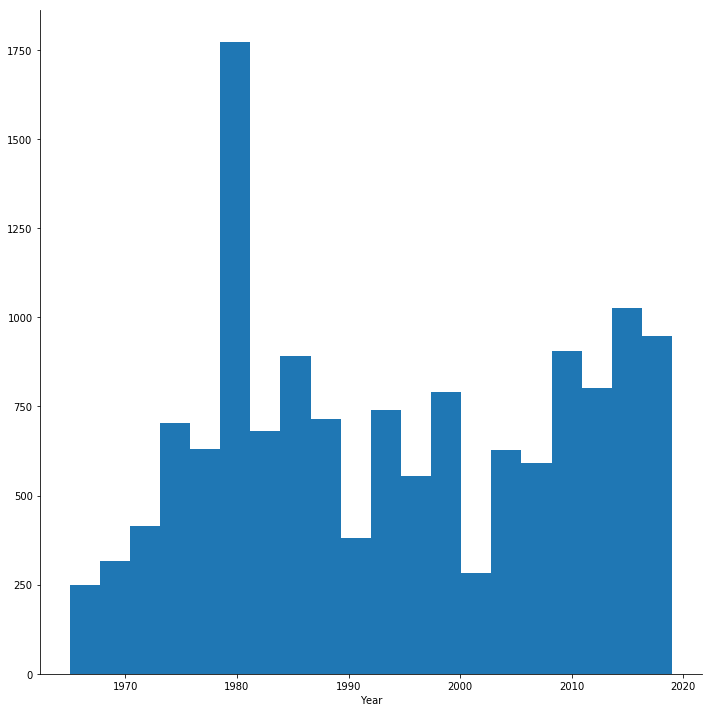

In [27]:
# show distribution with bar graph 
g = sns.FacetGrid(earthquake_df, height=10)
g.map(plt.hist, 'Year', bins=20)

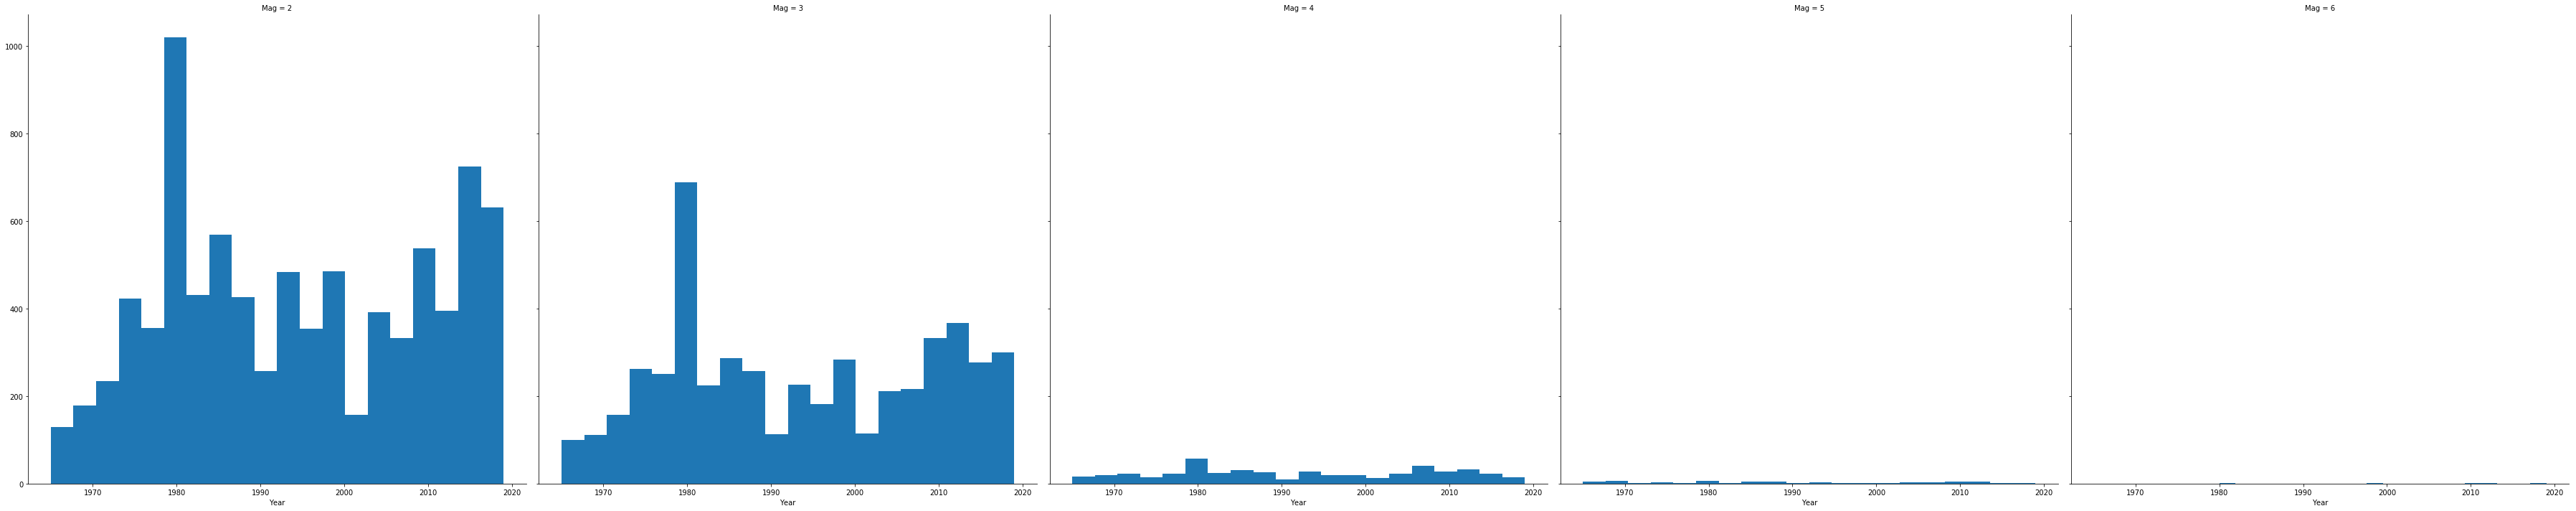

In [28]:
# show distribution for each magnitude column 
g = sns.FacetGrid(earthquake_df, col='Mag', height=10)
g.map(plt.hist, 'Year', bins=20)

In [20]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [22]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_test, y_test) * 100, 2)
print(f"Accuracy: {acc_log}")
print(f"Prediction: {Y_pred[:5]}")

Accuracy: 60.8
Prediction: [2 2 2 2 2]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

In [24]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_test, y_test) * 100, 2)
print(f"Accuracy: {acc_svc}")
print(f"prediction: {Y_pred[:5]}")

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 63.88
prediction: [2 2 2 3 2]


Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. 

Note that the model generates a confidence score which is higher than Logistics Regression model.

In [25]:
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, y_test) * 100, 2)
print(f"Accuracy: {acc_knn}")
print(f"prediction: {Y_pred[:5]}")

Accuracy: 63.57
prediction: [2 2 2 3 2]


In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. 

KNN confidence score is better than Logistics Regression but worse than SVM.

In [44]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    

k: 1, Train/Test Score: 0.996/0.542
k: 3, Train/Test Score: 0.777/0.584
k: 5, Train/Test Score: 0.727/0.611
k: 7, Train/Test Score: 0.706/0.613
k: 9, Train/Test Score: 0.696/0.628
k: 11, Train/Test Score: 0.687/0.630
k: 13, Train/Test Score: 0.683/0.636
k: 15, Train/Test Score: 0.680/0.631
k: 17, Train/Test Score: 0.673/0.631
k: 19, Train/Test Score: 0.671/0.636


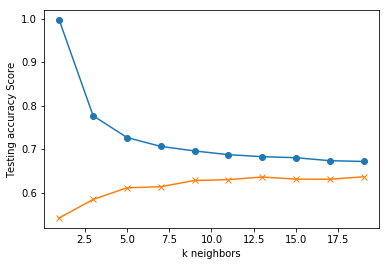

In [45]:
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [30]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)
knn_score = knn_score * 100
print('k=13 Test Acc: %.3f' % knn_score)

k=13 Test Acc: 63.569


In [31]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test, y_test) * 100, 2)
print(f"Accuracy: {acc_gaussian}")
print(f"prediction: {Y_pred[:5]}")

Accuracy: 63.6
prediction: [2 2 2 2 2]


In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. 


In [32]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_test, y_test) * 100, 2)
print(f"Accuracy: {acc_linear_svc}")
print(f"prediction: {Y_pred[:5]}")

Accuracy: 40.54
prediction: [3 2 3 2 3]


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [33]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
print(f"Accuracy: {acc_random_forest}")
print(f"prediction: {Y_pred[:5]}")

Accuracy: 59.66
prediction: [2 3 2 4 2]


In [34]:
sorted(zip(random_forest.feature_importances_, feature_names), reverse=True)

[(0.4552841404907575, 'Latitude'),
 (0.41719124499486976, 'Longitude'),
 (0.1275246145143727, 'Year')]

In [35]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
print(f"Accuracy: {acc_decision_tree}")
print(f"prediction: {Y_pred[:5]}")

Accuracy: 53.88
prediction: [2 4 2 4 2]


In [36]:
sorted(zip(decision_tree.feature_importances_, feature_names), reverse=True)

[(0.45747277128762703, 'Latitude'),
 (0.42026382401032597, 'Longitude'),
 (0.12226340470204705, 'Year')]